In this report, we are fetching the count of patients that booked a particular shift type i.e Morning, Afternoon or Evening for various months of 2022. This report will help us analyse that patients tend to prefer which slot in a month.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3 

In [2]:
connection = sqlite3.connect("Walk-In-Clinic-DB.db")

cursor = connection.cursor()
cursor.execute("SELECT PATIENT_NUMBER, SHIFT_TYPE, DATE  FROM DOCTOR_CALENDAR;")
results_patients = cursor.fetchall()
cursor.close()


In [3]:
report_patients = pd.DataFrame(results_patients, columns=['Patient Number', 'Shift Type', 'Date'])

In [4]:
report_patients['Year'] = pd.DatetimeIndex(report_patients['Date']).year
report_patients['Month'] = pd.DatetimeIndex(report_patients['Date']).month_name()
report_patients['Month']=report_patients['Month'].str.strip()
report_patients['Month'] = report_patients['Month'].str.replace(' ', '')

In [5]:
report_2022 = [2022];

filter_2022 = report_patients['Year'].isin(report_2022)

In [6]:
report_2022 = report_patients[filter_2022]

In [7]:
df_grouped = report_patients.groupby(['Shift Type', 'Month'])

In [8]:
patient_count = {}
for i, report_patients in df_grouped:
    patient_count[str(i)] = report_patients['Patient Number'].count()

In [9]:
patients_by_shift = pd.DataFrame(
    {"Shift Type, Month": patient_count.keys(), "Patient Count": patient_count.values()}
)


In [10]:
patients_by_shift[['Shift Type', 'Month']] = patients_by_shift['Shift Type, Month'].str.split(", ", expand=True)

patients_by_shift[['Shift Type', 'Month']]=patients_by_shift[['Shift Type', 'Month']].replace(regex=True,to_replace=r'[^0-9.\-aA-zZ, ]',value=r"")

patients_by_shift = patients_by_shift[["Shift Type", "Month", "Patient Count"]]

In [11]:
report_2022 = patients_by_shift.pivot_table(columns =['Month'], values ='Patient Count', index='Shift Type', sort=False)


In [12]:
report_2022 = report_2022.fillna(0)

report_2022=report_2022.astype(int)
report_2022


Month,April,August,December,July,June,May,November,October,September
Shift Type,,,,,,,,,
Afternoon,6,20,0,10,24,40,8,12,58
Evening,10,8,0,8,18,14,0,18,14
Morning,2,4,8,14,16,23,16,8,16


In the above report, we have count of bookings for various months of 2022. The data for this report is starting from the month of April.

Below is the Pie chart for number of bookings the Morning shift.

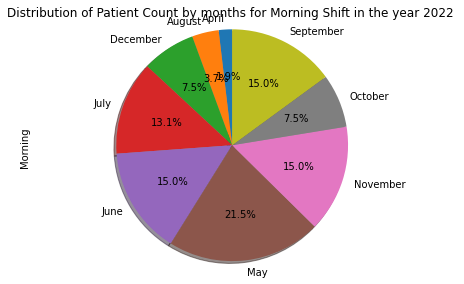

In [13]:
report_2022_chart=report_2022.iloc[2].plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
report_2022_chart.set_title("Distribution of Patient Count by months for Morning Shift in the year 2022 ")
report_2022_chart.axis('equal')
report_2022_chart = plt.tight_layout()
report_2022_chart

Below is the Pie chart for number of bookings the Afternoon shift.

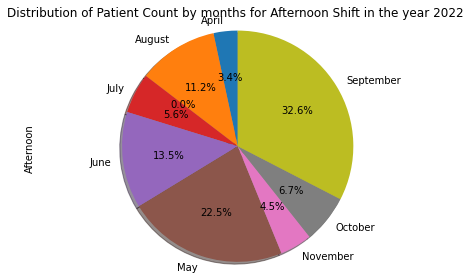

In [14]:
report_2022_chart=report_2022.iloc[0].plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
report_2022_chart.set_title("Distribution of Patient Count by months for Afternoon Shift in the year 2022 ")
report_2022_chart.axis('equal')
report_2022_chart = plt.tight_layout()

report_2022_chart

Below is the Pie chart for number of bookings the Evening shift.

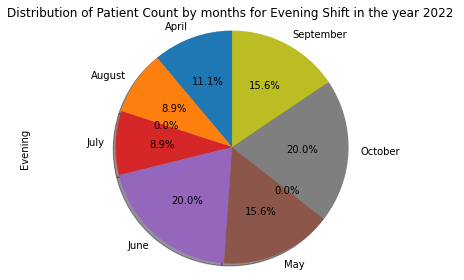

In [15]:

report_2022_chart=report_2022.iloc[1].plot.pie(autopct='%1.1f%%', shadow=True , startangle=90)
report_2022_chart.set_title("Distribution of Patient Count by months for Evening Shift in the year 2022 ")
report_2022_chart.axis('equal')
report_2022_chart = plt.tight_layout()


report_2022_chart

In [16]:
connection.close()